<a href="https://colab.research.google.com/github/heejjj/Sleeping_Project/blob/main/SJ_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [155]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [171]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [172]:
## 해당 경로에 있는 .csv 파일명 리스트 가져오기

import os

path = '/content/drive/MyDrive/KDT_project/HACKATHON/data/day_split_weekday'
file_list = os.listdir(path)
file_name = [file for file in file_list if file.endswith('.csv')] ## 파일명 끝이 .csv인 경우

In [173]:
cd /content/drive/MyDrive/KDT_project/HACKATHON/data/day_split_weekday

/content/drive/MyDrive/KDT_project/HACKATHON/data/day_split_weekday


In [174]:
data_weekday = pd.DataFrame()

for files in file_name:
    df= pd.read_csv(files)
    data_weekday = pd.concat([data_weekday, df])

In [175]:
data_weekday

,Unnamed: 0,Start,End,Duration (hr),Value,Source,Sl_start,weekday
0,297,2023-02-21 00:24:46,2023-02-21 00:52:16,0.458,Core,Sujeong의 Apple Watch,2023-02-21 00:24:46,1
1,299,2023-02-21 00:52:16,2023-02-21 00:57:16,0.083,Deep,Sujeong의 Apple Watch,2023-02-21 00:52:16,1
2,300,2023-02-21 00:57:16,2023-02-21 02:03:16,1.100,Core,Sujeong의 Apple Watch,2023-02-21 00:57:16,1
3,301,2023-02-21 02:03:16,2023-02-21 02:28:46,0.425,Deep,Sujeong의 Apple Watch,2023-02-21 02:03:16,1
4,302,2023-02-21 02:28:46,2023-02-21 02:29:16,0.008,Awake,Sujeong의 Apple Watch,2023-02-21 02:28:46,1
...,...,...,...,...,...,...,...,...
16,2948,2023-05-03 06:16:05,2023-05-03 06:44:05,0.467,Core,Sujeong의 Apple Watch,2023-05-03 06:16:05,2
17,2950,2023-05-03 06:44:05,2023-05-03 07:09:05,0.417,REM,Sujeong의 Apple Watch,2023-05-03 06:44:05,2
18,2951,2023-05-03 07:09:05,2023-05-03 07:29:05,0.333,Core,Sujeong의 Apple Watch,2023-05-03 07:09:05,2
19,2952,2023-05-03 07:29:05,2023-05-03 07:30:05,0.017,Awake,Sujeong의 Apple Watch,2023-05-03 07:29:05,2


In [176]:
data_weekday = data_weekday.drop('Unnamed: 0', axis=1)
data_weekday   

,Start,End,Duration (hr),Value,Source,Sl_start,weekday
0,2023-02-21 00:24:46,2023-02-21 00:52:16,0.458,Core,Sujeong의 Apple Watch,2023-02-21 00:24:46,1
1,2023-02-21 00:52:16,2023-02-21 00:57:16,0.083,Deep,Sujeong의 Apple Watch,2023-02-21 00:52:16,1
2,2023-02-21 00:57:16,2023-02-21 02:03:16,1.100,Core,Sujeong의 Apple Watch,2023-02-21 00:57:16,1
3,2023-02-21 02:03:16,2023-02-21 02:28:46,0.425,Deep,Sujeong의 Apple Watch,2023-02-21 02:03:16,1
4,2023-02-21 02:28:46,2023-02-21 02:29:16,0.008,Awake,Sujeong의 Apple Watch,2023-02-21 02:28:46,1
...,...,...,...,...,...,...,...
16,2023-05-03 06:16:05,2023-05-03 06:44:05,0.467,Core,Sujeong의 Apple Watch,2023-05-03 06:16:05,2
17,2023-05-03 06:44:05,2023-05-03 07:09:05,0.417,REM,Sujeong의 Apple Watch,2023-05-03 06:44:05,2
18,2023-05-03 07:09:05,2023-05-03 07:29:05,0.333,Core,Sujeong의 Apple Watch,2023-05-03 07:09:05,2
19,2023-05-03 07:29:05,2023-05-03 07:30:05,0.017,Awake,Sujeong의 Apple Watch,2023-05-03 07:29:05,2


In [177]:
data_weekday_end = data_weekday.reset_index()
data_weekday_end 

,index,Start,End,Duration (hr),Value,Source,Sl_start,weekday
0,0,2023-02-21 00:24:46,2023-02-21 00:52:16,0.458,Core,Sujeong의 Apple Watch,2023-02-21 00:24:46,1
1,1,2023-02-21 00:52:16,2023-02-21 00:57:16,0.083,Deep,Sujeong의 Apple Watch,2023-02-21 00:52:16,1
2,2,2023-02-21 00:57:16,2023-02-21 02:03:16,1.100,Core,Sujeong의 Apple Watch,2023-02-21 00:57:16,1
3,3,2023-02-21 02:03:16,2023-02-21 02:28:46,0.425,Deep,Sujeong의 Apple Watch,2023-02-21 02:03:16,1
4,4,2023-02-21 02:28:46,2023-02-21 02:29:16,0.008,Awake,Sujeong의 Apple Watch,2023-02-21 02:28:46,1
...,...,...,...,...,...,...,...,...
1429,16,2023-05-03 06:16:05,2023-05-03 06:44:05,0.467,Core,Sujeong의 Apple Watch,2023-05-03 06:16:05,2
1430,17,2023-05-03 06:44:05,2023-05-03 07:09:05,0.417,REM,Sujeong의 Apple Watch,2023-05-03 06:44:05,2
1431,18,2023-05-03 07:09:05,2023-05-03 07:29:05,0.333,Core,Sujeong의 Apple Watch,2023-05-03 07:09:05,2
1432,19,2023-05-03 07:29:05,2023-05-03 07:30:05,0.017,Awake,Sujeong의 Apple Watch,2023-05-03 07:29:05,2


In [178]:
# "Source" 열의 데이터를 레이블링 해줌.

data_weekday_end['Value']= data_weekday_end['Value'].replace('Deep',0)
data_weekday_end['Value']= data_weekday_end['Value'].replace('Core',1)
data_weekday_end['Value']= data_weekday_end['Value'].replace('REM',0)
data_weekday_end['Value']= data_weekday_end['Value'].replace('Awake',0)

data_weekday_end['Value'].value_counts()

0    767
1    667
Name: Value, dtype: int64

In [179]:
# 끝 점 index 정보를 담은 'idx' 변수 생성
idx = data_weekday_end[data_weekday_end['index']==0].index.values[1:]
idx = np.append(idx-1, len(data_weekday_end) - 1)
idx

array([  24,   58,   86,  145,  171,  197,  229,  254,  281,  318,  344,
        363,  405,  433,  457,  478,  524,  552,  566,  593,  614,  643,
        665,  715,  737,  768,  796,  822,  849,  884,  911,  937,  955,
        985, 1013, 1039, 1077, 1101, 1132, 1159, 1190, 1227, 1258, 1293,
       1317, 1342, 1359, 1397, 1412, 1433])

In [180]:
weekday_end = data_weekday_end.loc[idx]
weekday_end

,index,Start,End,Duration (hr),Value,Source,Sl_start,weekday
24,24,2023-02-21 05:57:16,2023-02-21 05:58:16,0.017,1,Sujeong의 Apple Watch,2023-02-21 05:57:16,1
58,33,2023-02-22 07:10:17,2023-02-22 07:38:47,0.475,1,Sujeong의 Apple Watch,2023-02-22 07:10:17,2
86,27,2023-02-23 07:10:23,2023-02-23 07:27:53,0.292,1,Sujeong의 Apple Watch,2023-02-23 07:10:23,3
145,58,2023-02-24 07:24:10,2023-02-24 07:27:40,0.058,1,Sujeong의 Apple Watch,2023-02-24 07:24:10,4
171,25,2023-02-27 07:26:42,2023-02-27 07:27:42,0.017,1,Sujeong의 Apple Watch,2023-02-27 07:26:42,0
197,25,2023-02-28 06:57:19,2023-02-28 06:58:19,0.017,1,Sujeong의 Apple Watch,2023-02-28 06:57:19,1
229,31,2023-03-02 07:17:47,2023-03-02 07:27:47,0.167,1,Sujeong의 Apple Watch,2023-03-02 07:17:47,3
254,24,2023-03-03 06:58:43,2023-03-03 07:00:43,0.033,0,Sujeong의 Apple Watch,2023-03-03 06:58:43,4
281,26,2023-03-06 07:18:05,2023-03-06 07:25:05,0.117,0,Sujeong의 Apple Watch,2023-03-06 07:18:05,0
318,36,2023-03-07 07:25:34,2023-03-07 07:28:04,0.042,1,Sujeong의 Apple Watch,2023-03-07 07:25:34,1


In [181]:
#slst = sleep_start

weekday_end['Sl_end'] = pd.to_datetime(weekday_end['End'], format='%Y-%m-%d %H:%M:%S', errors='raise')
weekday_end['slend_time']  = weekday_end['Sl_end'].dt.time         # HH:MM:SS(문자)
weekday_end['slend_hour']  = weekday_end['Sl_end'].dt.hour         # 시(숫자)
weekday_end['slend_minute'] = weekday_end['Sl_end'].dt.minute       # 분(숫자)
weekday_end['slend_second'] = weekday_end['Sl_end'].dt.second       # 초(숫자)

weekday_end

,index,Start,End,Duration (hr),Value,Source,Sl_start,weekday,Sl_end,slend_time,slend_hour,slend_minute,slend_second
24,24,2023-02-21 05:57:16,2023-02-21 05:58:16,0.017,1,Sujeong의 Apple Watch,2023-02-21 05:57:16,1,2023-02-21 05:58:16,05:58:16,5,58,16
58,33,2023-02-22 07:10:17,2023-02-22 07:38:47,0.475,1,Sujeong의 Apple Watch,2023-02-22 07:10:17,2,2023-02-22 07:38:47,07:38:47,7,38,47
86,27,2023-02-23 07:10:23,2023-02-23 07:27:53,0.292,1,Sujeong의 Apple Watch,2023-02-23 07:10:23,3,2023-02-23 07:27:53,07:27:53,7,27,53
145,58,2023-02-24 07:24:10,2023-02-24 07:27:40,0.058,1,Sujeong의 Apple Watch,2023-02-24 07:24:10,4,2023-02-24 07:27:40,07:27:40,7,27,40
171,25,2023-02-27 07:26:42,2023-02-27 07:27:42,0.017,1,Sujeong의 Apple Watch,2023-02-27 07:26:42,0,2023-02-27 07:27:42,07:27:42,7,27,42
197,25,2023-02-28 06:57:19,2023-02-28 06:58:19,0.017,1,Sujeong의 Apple Watch,2023-02-28 06:57:19,1,2023-02-28 06:58:19,06:58:19,6,58,19
229,31,2023-03-02 07:17:47,2023-03-02 07:27:47,0.167,1,Sujeong의 Apple Watch,2023-03-02 07:17:47,3,2023-03-02 07:27:47,07:27:47,7,27,47
254,24,2023-03-03 06:58:43,2023-03-03 07:00:43,0.033,0,Sujeong의 Apple Watch,2023-03-03 06:58:43,4,2023-03-03 07:00:43,07:00:43,7,0,43
281,26,2023-03-06 07:18:05,2023-03-06 07:25:05,0.117,0,Sujeong의 Apple Watch,2023-03-06 07:18:05,0,2023-03-06 07:25:05,07:25:05,7,25,5
318,36,2023-03-07 07:25:34,2023-03-07 07:28:04,0.042,1,Sujeong의 Apple Watch,2023-03-07 07:25:34,1,2023-03-07 07:28:04,07:28:04,7,28,4


In [182]:
count = weekday_end[weekday_end['slend_hour']==7]["slend_minute"].value_counts()
df1 = pd.DataFrame(data=count.index, columns=['day'])
df2 = pd.DataFrame(data=count.values, columns=['count'])
day_count = pd.merge(df1, df2, left_index=True, right_index=True)
day_count

,day,count
0,25,15
1,27,7
2,28,6
3,26,3
4,21,2
5,23,2
6,12,2
7,38,1
8,0,1
9,20,1


In [123]:
tmp = day_count.sort_values("day")
tmp = tmp.set_index('day')
tmp

,count
day,
0,1
12,2
20,1
21,2
22,1
23,2
24,1
25,15
26,3


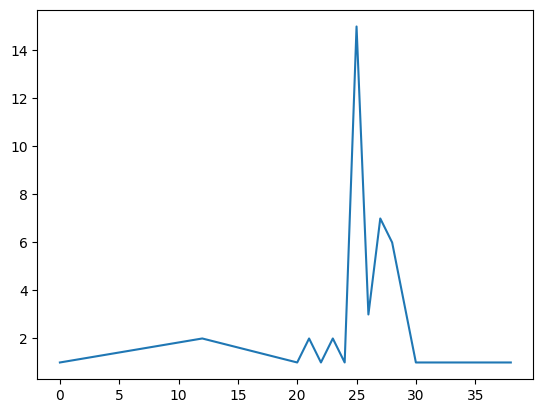

In [124]:
plt.plot(tmp)

In [183]:
weekday_onehot = data_weekday.reset_index()
weekday_onehot.head()

,index,Start,End,Duration (hr),Value,Source,Sl_start,weekday
0,0,2023-02-21 00:24:46,2023-02-21 00:52:16,0.458,Core,Sujeong의 Apple Watch,2023-02-21 00:24:46,1
1,1,2023-02-21 00:52:16,2023-02-21 00:57:16,0.083,Deep,Sujeong의 Apple Watch,2023-02-21 00:52:16,1
2,2,2023-02-21 00:57:16,2023-02-21 02:03:16,1.100,Core,Sujeong의 Apple Watch,2023-02-21 00:57:16,1
3,3,2023-02-21 02:03:16,2023-02-21 02:28:46,0.425,Deep,Sujeong의 Apple Watch,2023-02-21 02:03:16,1
4,4,2023-02-21 02:28:46,2023-02-21 02:29:16,0.008,Awake,Sujeong의 Apple Watch,2023-02-21 02:28:46,1


In [184]:
# "Source" 열의 데이터를 레이블링 해줌.

weekday_onehot['Value']= weekday_onehot['Value'].replace('Deep',0)
weekday_onehot['Value']= weekday_onehot['Value'].replace('Core',1)
weekday_onehot['Value']= weekday_onehot['Value'].replace('REM',0)
weekday_onehot['Value']= weekday_onehot['Value'].replace('Awake',0)

weekday_onehot['Value'].value_counts()

0    767
1    667
Name: Value, dtype: int64

In [185]:
#slst = sleep_start

weekday_onehot['Sl_end'] = pd.to_datetime(weekday_onehot['End'], format='%Y-%m-%d %H:%M:%S', errors='raise')
weekday_onehot['slend_time']  = weekday_onehot['Sl_end'].dt.time         # HH:MM:SS(문자)

weekday_onehot.head()

,index,Start,End,Duration (hr),Value,Source,Sl_start,weekday,Sl_end,slend_time
0,0,2023-02-21 00:24:46,2023-02-21 00:52:16,0.458,1,Sujeong의 Apple Watch,2023-02-21 00:24:46,1,2023-02-21 00:52:16,00:52:16
1,1,2023-02-21 00:52:16,2023-02-21 00:57:16,0.083,0,Sujeong의 Apple Watch,2023-02-21 00:52:16,1,2023-02-21 00:57:16,00:57:16
2,2,2023-02-21 00:57:16,2023-02-21 02:03:16,1.100,1,Sujeong의 Apple Watch,2023-02-21 00:57:16,1,2023-02-21 02:03:16,02:03:16
3,3,2023-02-21 02:03:16,2023-02-21 02:28:46,0.425,0,Sujeong의 Apple Watch,2023-02-21 02:03:16,1,2023-02-21 02:28:46,02:28:46
4,4,2023-02-21 02:28:46,2023-02-21 02:29:16,0.008,0,Sujeong의 Apple Watch,2023-02-21 02:28:46,1,2023-02-21 02:29:16,02:29:16


In [186]:
weekday_onehot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1434 entries, 0 to 1433
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   index          1434 non-null   int64         
 1   Start          1434 non-null   object        
 2   End            1434 non-null   object        
 3   Duration (hr)  1434 non-null   float64       
 4   Value          1434 non-null   int64         
 5   Source         1434 non-null   object        
 6   Sl_start       1434 non-null   object        
 7   weekday        1434 non-null   int64         
 8   Sl_end         1434 non-null   datetime64[ns]
 9   slend_time     1434 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(3), object(5)
memory usage: 112.2+ KB


In [187]:
# 날짜마다 00시부터 7시 25분까지 30초씩 증가하는 리스트를 만들기 위해 날짜 정보를 담은 end_date 변수 생성
end = weekday_onehot.loc[idx,'Sl_end']
end_date = end.dt.date

df1 = pd.DataFrame(data=end_date.index, columns=['index'])
df2 = pd.DataFrame(data=end_date.values, columns=['date'])
end_date = pd.merge(df1, df2, left_index=True, right_index=True)
end_date

,index,date
0,24,2023-02-21
1,58,2023-02-22
2,86,2023-02-23
3,145,2023-02-24
4,171,2023-02-27
5,197,2023-02-28
6,229,2023-03-02
7,254,2023-03-03
8,281,2023-03-06
9,318,2023-03-07


In [191]:
# 날짜마다 00시부터 7시 25분까지 30초씩 증가하는 리스트를 만들기 위해 시작 날짜와 00시 정보를 담은 'start_date_list'를 생성
import datetime

start_date_list = []
for i in range(len(idx)):
  dt = end_date.iloc[i,1].strftime('%Y-%m-%d')
  tm = " 00:00:16"
  
  start_date_list.append(dt + tm)

start_date_list

['2023-02-21 00:00:16',
 '2023-02-22 00:00:16',
 '2023-02-23 00:00:16',
 '2023-02-24 00:00:16',
 '2023-02-27 00:00:16',
 '2023-02-28 00:00:16',
 '2023-03-02 00:00:16',
 '2023-03-03 00:00:16',
 '2023-03-06 00:00:16',
 '2023-03-07 00:00:16',
 '2023-03-08 00:00:16',
 '2023-03-09 00:00:16',
 '2023-03-10 00:00:16',
 '2023-03-13 00:00:16',
 '2023-03-14 00:00:16',
 '2023-03-15 00:00:16',
 '2023-03-16 00:00:16',
 '2023-03-17 00:00:16',
 '2023-03-20 00:00:16',
 '2023-03-22 00:00:16',
 '2023-03-23 00:00:16',
 '2023-03-24 00:00:16',
 '2023-03-27 00:00:16',
 '2023-03-28 00:00:16',
 '2023-03-29 00:00:16',
 '2023-03-30 00:00:16',
 '2023-03-31 00:00:16',
 '2023-04-03 00:00:16',
 '2023-04-04 00:00:16',
 '2023-04-05 00:00:16',
 '2023-04-06 00:00:16',
 '2023-04-07 00:00:16',
 '2023-04-10 00:00:16',
 '2023-04-11 00:00:16',
 '2023-04-12 00:00:16',
 '2023-04-13 00:00:16',
 '2023-04-14 00:00:16',
 '2023-04-17 00:00:16',
 '2023-04-18 00:00:16',
 '2023-04-19 00:00:16',
 '2023-04-20 00:00:16',
 '2023-04-21 00:

In [192]:
# 날짜마다 00시부터 7시 17분까지 30초씩 증가하는 리스트를 만들기 위해 날짜와 7시17분 정보를 담은 'end_date_list'를 생성
import datetime

end_date_list = []
for i in range(len(idx)):
  dt = end_date.iloc[i,1].strftime('%Y-%m-%d')
  tm = " 07:25:16"
  
  end_date_list.append(dt + tm)

end_date_list

['2023-02-21 07:25:16',
 '2023-02-22 07:25:16',
 '2023-02-23 07:25:16',
 '2023-02-24 07:25:16',
 '2023-02-27 07:25:16',
 '2023-02-28 07:25:16',
 '2023-03-02 07:25:16',
 '2023-03-03 07:25:16',
 '2023-03-06 07:25:16',
 '2023-03-07 07:25:16',
 '2023-03-08 07:25:16',
 '2023-03-09 07:25:16',
 '2023-03-10 07:25:16',
 '2023-03-13 07:25:16',
 '2023-03-14 07:25:16',
 '2023-03-15 07:25:16',
 '2023-03-16 07:25:16',
 '2023-03-17 07:25:16',
 '2023-03-20 07:25:16',
 '2023-03-22 07:25:16',
 '2023-03-23 07:25:16',
 '2023-03-24 07:25:16',
 '2023-03-27 07:25:16',
 '2023-03-28 07:25:16',
 '2023-03-29 07:25:16',
 '2023-03-30 07:25:16',
 '2023-03-31 07:25:16',
 '2023-04-03 07:25:16',
 '2023-04-04 07:25:16',
 '2023-04-05 07:25:16',
 '2023-04-06 07:25:16',
 '2023-04-07 07:25:16',
 '2023-04-10 07:25:16',
 '2023-04-11 07:25:16',
 '2023-04-12 07:25:16',
 '2023-04-13 07:25:16',
 '2023-04-14 07:25:16',
 '2023-04-17 07:25:16',
 '2023-04-18 07:25:16',
 '2023-04-19 07:25:16',
 '2023-04-20 07:25:16',
 '2023-04-21 07:

In [193]:
# 1분 간격으로 데이터를 보기로 했으므로 30초씩 증가시키는 시간 리스트 만듦.
# 날짜마다 00시부터 7시 17분까지 30초씩 증가하는 리스트인 'time_list' 변수 생성
import datetime

time_list = []
for i in range(len(idx)):
  start = start_date_list[i]
  start = pd.to_datetime(start, format='%Y-%m-%d %H:%M:%S', errors='raise')
  end = end_date_list[i]
  end = pd.to_datetime(end, format='%Y-%m-%d %H:%M:%S', errors='raise')

  duration = end - start  

  k = duration.seconds // 30   # 60초 간격의 시간 몇 개로 만들어야 하는지. 몫.

  # 30초씩 증가시켜서 시간 리스트 만들기.
  time_list.append(start)
  for i in range(k):
    later = start + datetime.timedelta(seconds=30)
    time_list.append(later)
    start = later

time_list[:10]

[Timestamp('2023-02-21 00:00:16'),
 Timestamp('2023-02-21 00:00:46'),
 Timestamp('2023-02-21 00:01:16'),
 Timestamp('2023-02-21 00:01:46'),
 Timestamp('2023-02-21 00:02:16'),
 Timestamp('2023-02-21 00:02:46'),
 Timestamp('2023-02-21 00:03:16'),
 Timestamp('2023-02-21 00:03:46'),
 Timestamp('2023-02-21 00:04:16'),
 Timestamp('2023-02-21 00:04:46')]

In [197]:
start = start_date_list[0]
start = pd.to_datetime(start, format='%Y-%m-%d %H:%M:%S', errors='raise')
end = end_date_list[0]
end = pd.to_datetime(end, format='%Y-%m-%d %H:%M:%S', errors='raise')

duration = end - start  

k = duration.seconds // 30
k

890

In [198]:
time_list[885:895] # 리스트가 잘 생성되었음을 확인할 수 있음.

[Timestamp('2023-02-21 07:22:46'),
 Timestamp('2023-02-21 07:23:16'),
 Timestamp('2023-02-21 07:23:46'),
 Timestamp('2023-02-21 07:24:16'),
 Timestamp('2023-02-21 07:24:46'),
 Timestamp('2023-02-21 07:25:16'),
 Timestamp('2023-02-22 00:00:16'),
 Timestamp('2023-02-22 00:00:46'),
 Timestamp('2023-02-22 00:01:16'),
 Timestamp('2023-02-22 00:01:46')]

In [199]:
len(time_list) % k   # 50일이므로 리스트가 잘 만들어졌음을 확인할 수 있음.

50

In [200]:
# 00시부터 7시 25분까지 Value 정보를 할당할 df를 생성함.
# 1(Core)로 채워진 df 만들기.
myArr = np.ones(len(time_list))
target = pd.DataFrame(columns = time_list)
target.loc[0]= myArr
target

,2023-02-21 00:00:16,2023-02-21 00:00:46,2023-02-21 00:01:16,2023-02-21 00:01:46,2023-02-21 00:02:16,2023-02-21 00:02:46,2023-02-21 00:03:16,2023-02-21 00:03:46,2023-02-21 00:04:16,2023-02-21 00:04:46,...,2023-05-03 07:20:46,2023-05-03 07:21:16,2023-05-03 07:21:46,2023-05-03 07:22:16,2023-05-03 07:22:46,2023-05-03 07:23:16,2023-05-03 07:23:46,2023-05-03 07:24:16,2023-05-03 07:24:46,2023-05-03 07:25:16
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [203]:
weekday = target.T
weekday   # 44550 rows × 1 columns

,0
2023-02-21 00:00:16,1.0
2023-02-21 00:00:46,1.0
2023-02-21 00:01:16,1.0
2023-02-21 00:01:46,1.0
2023-02-21 00:02:16,1.0
...,...
2023-05-03 07:23:16,1.0
2023-05-03 07:23:46,1.0
2023-05-03 07:24:16,1.0
2023-05-03 07:24:46,1.0


In [204]:
weekday

,0
2023-02-21 00:00:16,1.0
2023-02-21 00:00:46,1.0
2023-02-21 00:01:16,1.0
2023-02-21 00:01:46,1.0
2023-02-21 00:02:16,1.0
...,...
2023-05-03 07:23:16,1.0
2023-05-03 07:23:46,1.0
2023-05-03 07:24:16,1.0
2023-05-03 07:24:46,1.0


In [205]:
weekday.to_csv('weekday_lstm.csv')

# data

In [138]:
weekday.value_counts()

1.0    22300
dtype: int64

In [140]:
22300/446

50.0

# !여기를 보시면 됩니다!

In [214]:
weekday_onehot['Sl_start'] = pd.to_datetime(weekday_onehot['Sl_start'], format='%Y-%m-%d %H:%M:%S', errors='raise')
onehot_idx = np.append(-1, weekday_end.index.values) 
i = 8
df = weekday_onehot.loc[(onehot_idx[i]+1):onehot_idx[i+1]]
df[df["Value"]==0]


,index,Start,End,Duration (hr),Value,Source,Sl_start,weekday,Sl_end,slend_time
256,1,2023-03-05 23:30:35,2023-03-05 23:34:05,0.058,0,Sujeong의 Apple Watch,2023-03-05 23:30:35,6,2023-03-05 23:34:05,23:34:05
258,3,2023-03-05 23:54:05,2023-03-05 23:57:05,0.050,0,Sujeong의 Apple Watch,2023-03-05 23:54:05,6,2023-03-05 23:57:05,23:57:05
260,5,2023-03-05 23:59:35,2023-03-06 00:23:35,0.400,0,Sujeong의 Apple Watch,2023-03-05 23:59:35,6,2023-03-06 00:23:35,00:23:35
262,7,2023-03-06 00:35:05,2023-03-06 00:35:35,0.008,0,Sujeong의 Apple Watch,2023-03-06 00:35:05,0,2023-03-06 00:35:35,00:35:35
264,9,2023-03-06 00:37:05,2023-03-06 00:53:35,0.275,0,Sujeong의 Apple Watch,2023-03-06 00:37:05,0,2023-03-06 00:53:35,00:53:35
266,11,2023-03-06 01:18:05,2023-03-06 01:30:05,0.200,0,Sujeong의 Apple Watch,2023-03-06 01:18:05,0,2023-03-06 01:30:05,01:30:05
268,13,2023-03-06 01:31:05,2023-03-06 01:51:35,0.342,0,Sujeong의 Apple Watch,2023-03-06 01:31:05,0,2023-03-06 01:51:35,01:51:35
270,15,2023-03-06 02:02:35,2023-03-06 02:13:35,0.183,0,Sujeong의 Apple Watch,2023-03-06 02:02:35,0,2023-03-06 02:13:35,02:13:35
272,17,2023-03-06 03:41:05,2023-03-06 04:00:35,0.325,0,Sujeong의 Apple Watch,2023-03-06 03:41:05,0,2023-03-06 04:00:35,04:00:35
273,18,2023-03-06 04:00:35,2023-03-06 04:02:35,0.033,0,Sujeong의 Apple Watch,2023-03-06 04:00:35,0,2023-03-06 04:02:35,04:02:35


# try

In [63]:
idx = data_weekday_end[data_weekday_end['index']==0].index.values[1:]
idx = np.append(idx-1, len(data_weekday_end) - 1)
idx

array([  24,   58,   86,  145,  171,  197,  229,  254,  281,  318,  344,
        363,  405,  433,  457,  478,  524,  552,  566,  593,  614,  643,
        665,  715,  737,  768,  796,  822,  849,  884,  911,  937,  955,
        985, 1013, 1039, 1077, 1101, 1132, 1159, 1190, 1227, 1258, 1293,
       1317, 1342, 1359, 1397, 1412, 1433])

In [69]:
weekday_end.index.values

array([  24,   58,   86,  145,  171,  197,  229,  254,  281,  318,  344,
        363,  405,  433,  457,  478,  524,  552,  566,  593,  614,  643,
        665,  715,  737,  768,  796,  822,  849,  884,  911,  937,  955,
        985, 1013, 1039, 1077, 1101, 1132, 1159, 1190, 1227, 1258, 1293,
       1317, 1342, 1359, 1397, 1412, 1433])

In [48]:
# 범위에 해당하는 'Value'값을 할당해주기 위해
# 일자별로 분리하기 위한 test 코드.
i = 1
weekday_onehot['Sl_start'] = pd.to_datetime(weekday_onehot['Sl_start'], format='%Y-%m-%d %H:%M:%S', errors='raise')
onehot_idx = np.append(-1, weekday_end.index.values) 
df = weekday_onehot.loc[(onehot_idx[i]+1):onehot_idx[i+1]]
df

,index,Start,End,Duration (hr),Value,Source,Sl_start,weekday,Sl_end,slend_time
25,0,2023-02-22 00:29:17,2023-02-22 00:47:17,0.300,1,Sujeong의 Apple Watch,2023-02-22 00:29:17,2,2023-02-22 00:47:17,00:47:17
26,1,2023-02-22 00:47:17,2023-02-22 01:12:47,0.425,0,Sujeong의 Apple Watch,2023-02-22 00:47:17,2,2023-02-22 01:12:47,01:12:47
27,2,2023-02-22 01:12:47,2023-02-22 01:13:47,0.017,0,Sujeong의 Apple Watch,2023-02-22 01:12:47,2,2023-02-22 01:13:47,01:13:47
28,3,2023-02-22 01:13:47,2023-02-22 01:35:47,0.367,1,Sujeong의 Apple Watch,2023-02-22 01:13:47,2,2023-02-22 01:35:47,01:35:47
29,4,2023-02-22 01:35:47,2023-02-22 01:40:47,0.083,0,Sujeong의 Apple Watch,2023-02-22 01:35:47,2,2023-02-22 01:40:47,01:40:47
30,5,2023-02-22 01:40:47,2023-02-22 01:41:47,0.017,0,Sujeong의 Apple Watch,2023-02-22 01:40:47,2,2023-02-22 01:41:47,01:41:47
31,6,2023-02-22 01:41:47,2023-02-22 01:51:47,0.167,1,Sujeong의 Apple Watch,2023-02-22 01:41:47,2,2023-02-22 01:51:47,01:51:47
32,7,2023-02-22 01:51:47,2023-02-22 01:52:17,0.008,0,Sujeong의 Apple Watch,2023-02-22 01:51:47,2,2023-02-22 01:52:17,01:52:17
33,8,2023-02-22 01:52:17,2023-02-22 02:13:17,0.350,1,Sujeong의 Apple Watch,2023-02-22 01:52:17,2,2023-02-22 02:13:17,02:13:17
34,9,2023-02-22 02:13:17,2023-02-22 02:30:47,0.292,0,Sujeong의 Apple Watch,2023-02-22 02:13:17,2,2023-02-22 02:30:47,02:30:47


In [50]:
weekday_onehot['Sl_start'] = pd.to_datetime(weekday_onehot['Sl_start'], format='%Y-%m-%d %H:%M:%S', errors='raise')
onehot_idx = np.append(-1, weekday_end.index.values) 
onehot_idx

array([  -1,   24,   58,   86,  145,  171,  197,  229,  254,  281,  318,
        344,  363,  405,  433,  457,  478,  524,  552,  566,  593,  614,
        643,  665,  715,  737,  768,  796,  822,  849,  884,  911,  937,
        955,  985, 1013, 1039, 1077, 1101, 1132, 1159, 1190, 1227, 1258,
       1293, 1317, 1342, 1359, 1397, 1412, 1433])

In [59]:
# 범위에 해당하는 'Value'값을 할당해주기 위해
# 일자별로 분리하기 위한 test 코드.
# 

weekday_onehot['Sl_start'] = pd.to_datetime(weekday_onehot['Sl_start'], format='%Y-%m-%d %H:%M:%S', errors='raise')
onehot_idx = np.append(-1, weekday_end.index.values) 
i = len(onehot_idx) - 1
i
# df = weekday_onehot.loc[(onehot_idx[i]+1):onehot_idx[i+1]]
# df

50

In [83]:
# 범위에 해당하는 'Value'값을 할당해주기 위해
# 일자별로 분리하기 위한 test 코드.
weekday_onehot['Sl_start'] = pd.to_datetime(weekday_onehot['Sl_start'], format='%Y-%m-%d %H:%M:%S', errors='raise')
onehot_idx = np.append(-1, weekday_end.index.values) 

for i in range(len(onehot_idx)-1):
  df = weekday_onehot.loc[(onehot_idx[i]+1):onehot_idx[i+1]]
  k = 1
  t = 445 * (k-1)  # 60분 간격으로 00시부터 7시 25분까지 나눴을 때 446개의 list가 만들어짐.


  ncore_idx = df[df['Value'] == 0]['index'].values  # Value == 0인 행 인덱스 값 (array 형태)

  # 00:00:00이 넘는 시간부터 적용하기 위함.
  r = 0  # 행 인덱스. "ncore_idx"에 대한 인덱스
  # 'Sl_start' 또는 'Sl_end' 가 00시 이후인 행의 정보를 저장한 변수 "r"
  while (df.loc[ncore_idx[r],'Sl_start'] < time_list[t]) | (df.loc[ncore_idx[r],'Sl_end'] < time_list[t]):
    r += 1

r

KeyError: ignored

In [89]:
r=0
df.loc[ncore_idx[r],'Sl_start']

KeyError: ignored

In [87]:
r=0
while df.loc[ncore_idx[r],'Sl_start'] < time_list[t]:
  print(r)

KeyError: ignored

In [95]:
df

,index,Start,End,Duration (hr),Value,Source,Sl_start,weekday,Sl_end,slend_time
25,0,2023-02-22 00:29:17,2023-02-22 00:47:17,0.300,1,Sujeong의 Apple Watch,2023-02-22 00:29:17,2,2023-02-22 00:47:17,00:47:17
26,1,2023-02-22 00:47:17,2023-02-22 01:12:47,0.425,0,Sujeong의 Apple Watch,2023-02-22 00:47:17,2,2023-02-22 01:12:47,01:12:47
27,2,2023-02-22 01:12:47,2023-02-22 01:13:47,0.017,0,Sujeong의 Apple Watch,2023-02-22 01:12:47,2,2023-02-22 01:13:47,01:13:47
28,3,2023-02-22 01:13:47,2023-02-22 01:35:47,0.367,1,Sujeong의 Apple Watch,2023-02-22 01:13:47,2,2023-02-22 01:35:47,01:35:47
29,4,2023-02-22 01:35:47,2023-02-22 01:40:47,0.083,0,Sujeong의 Apple Watch,2023-02-22 01:35:47,2,2023-02-22 01:40:47,01:40:47
30,5,2023-02-22 01:40:47,2023-02-22 01:41:47,0.017,0,Sujeong의 Apple Watch,2023-02-22 01:40:47,2,2023-02-22 01:41:47,01:41:47
31,6,2023-02-22 01:41:47,2023-02-22 01:51:47,0.167,1,Sujeong의 Apple Watch,2023-02-22 01:41:47,2,2023-02-22 01:51:47,01:51:47
32,7,2023-02-22 01:51:47,2023-02-22 01:52:17,0.008,0,Sujeong의 Apple Watch,2023-02-22 01:51:47,2,2023-02-22 01:52:17,01:52:17
33,8,2023-02-22 01:52:17,2023-02-22 02:13:17,0.350,1,Sujeong의 Apple Watch,2023-02-22 01:52:17,2,2023-02-22 02:13:17,02:13:17
34,9,2023-02-22 02:13:17,2023-02-22 02:30:47,0.292,0,Sujeong의 Apple Watch,2023-02-22 02:13:17,2,2023-02-22 02:30:47,02:30:47


In [96]:
weekday_onehot['Sl_start'] = pd.to_datetime(weekday_onehot['Sl_start'], format='%Y-%m-%d %H:%M:%S', errors='raise')
onehot_idx = np.append(-1, weekday_end.index.values) 

df = weekday_onehot.loc[(onehot_idx[i]+1):onehot_idx[i+1]]
k = 1
t = 445 * (k-1)  # 60분 간격으로 00시부터 7시 25분까지 나눴을 때 446개의 list가 만들어짐.


ncore_idx = df[df['Value'] == 0]['index'].values 

r = 0
while (df.iloc[ncore_idx[r],6] < time_list[t]) | (df.iloc[ncore_idx[r],8] < time_list[t]):
  r += 1

r

0

# try

In [143]:
# 범위에 해당하는 'Value'값을 할당해주기 위해
# 일자별로 분리하기 위한 test 코드.
weekday_onehot['Sl_start'] = pd.to_datetime(weekday_onehot['Sl_start'], format='%Y-%m-%d %H:%M:%S', errors='raise')
onehot_idx = np.append(-1, weekday_end.index.values) 
df = weekday_onehot.loc[(onehot_idx[0]+1):onehot_idx[1]]

test = []
k = 1
t = 446 * (k-1)  # 60분 간격으로 00시부터 7시 25분까지 나눴을 때 446개의 list가 만들어짐.


ncore_idx = df[df['Value'] == 0]['index'].values  # Value == 0인 행 인덱스 값 (array 형태)

# 00:00:00이 넘는 시간부터 적용하기 위함.
r = 0  # 행 인덱스. "ncore_idx"에 대한 인덱스
# 'Sl_start' 또는 'Sl_end' 가 00시 이후인 행의 정보를 저장한 변수 "r"
while (df.loc[ncore_idx[r],'Sl_start'] < time_list[t]) | (df.loc[ncore_idx[r],'Sl_end'] < time_list[t]):
  r += 1

row_num = r  # "ncore_idx"에 대한 인덱스
# 'Sl_start'가 00시 이전이고 'Sl_end'가 00시 이후인 경우를 고려하기 위한 if문
if (df.loc[ncore_idx[row_num],'Sl_start'] > time_list[t]):
  # target 데이터프레임에 값 할당하기
  for j in range(r, len(ncore_idx)):
    row_index = ncore_idx[j]  # df의 행 인덱스 정보를 담은 'row_index' 변수 생성.
    # 00시 이후의 시간의 hour
    hour = int(str(df.loc[row_index,'Sl_start'])[11:13])
    minute = int(str(df.loc[row_index,'Sl_start'])[14:16])
    time = t + hour*60 + minute
    duration = df.loc[row_index,'Sl_end'] - df.loc[row_index,'Sl_start']

    # 16초에서 30초 duration이면 적용이 되고
    # 46초에서 30초 duration이면 적용이 안되는 문제 존재. 해결 못함 일단 시도
    rep_time = duration.seconds // 60 
    target.iloc[:,time:(time+rep_time + 1)] = 0

    # 적용이 잘 되었는지 확인하기 위함. 
    test.append(target.iloc[:,time:(time+rep_time + 1)])

else:  # 'Sl_start'가 00시 이전이고 'Sl_end'가 00시 이후인 경우
  # target 데이터프레임에 값 할당하기
  hour = 0 
  minute = 0
  duration = df.loc[ncore_idx[row_num],'Sl_end'] - time_list[t]
  for j in range(row_num,len(ncore_idx)):
    row_index = ncore_idx[j]
    time = t + hour*60 + minute
    rep_time = duration.seconds // 60
    target.iloc[:,time:(time+rep_time + 1)] = 0
    # 00시 이후의 시간의 hour
    hour = int(str(df.loc[row_index,'Sl_start'])[11:13])
    minute = int(str(df.loc[row_index,'Sl_start'])[14:16])
    duration = df.loc[row_index,'Sl_end'] - df.loc[row_index,'Sl_start']
    
    # 적용이 잘 되었는지 확인하기 위함.
    test.append(target.iloc[:,time:(time+rep_time + 1)])
    

k += 1  

In [144]:
weekday = target.T
weekday.value_counts()

1.0    21675
0.0      625
dtype: int64

In [147]:
# 범위에 해당하는 'Value'값을 할당해주기 위해
# 일자별로 분리하기 위한 test 코드.
weekday_onehot['Sl_start'] = pd.to_datetime(weekday_onehot['Sl_start'], format='%Y-%m-%d %H:%M:%S', errors='raise')
onehot_idx = np.append(-1, weekday_end.index.values) 

i = 1
df = weekday_onehot.loc[(onehot_idx[i]+1):onehot_idx[i+1]]

test = []
k = 1
t = 446 * (k-1)  # 60분 간격으로 00시부터 7시 25분까지 나눴을 때 446개의 list가 만들어짐.


ncore_idx = df[df['Value'] == 0]['index'].values  # Value == 0인 행 인덱스 값 (array 형태)

# 00:00:00이 넘는 시간부터 적용하기 위함.
r = 0  # 행 인덱스. "ncore_idx"에 대한 인덱스
# 'Sl_start' 또는 'Sl_end' 가 00시 이후인 행의 정보를 저장한 변수 "r"
while (df.iloc[ncore_idx[r],6] < time_list[t]) | (df.iloc[ncore_idx[r],8] < time_list[t]):
  r += 1

row_num = r  # "ncore_idx"에 대한 인덱스
# 'Sl_start'가 00시 이전이고 'Sl_end'가 00시 이후인 경우를 고려하기 위한 if문
if (df.iloc[ncore_idx[row_num],6] > time_list[t]):
  # target 데이터프레임에 값 할당하기
  for j in range(r, len(ncore_idx)):
    row_index = ncore_idx[j]  # df의 행 인덱스 정보를 담은 'row_index' 변수 생성.
    # 00시 이후의 시간의 hour
    hour = int(str(df.iloc[row_index,6])[11:13])
    minute = int(str(df.iloc[row_index,6])[14:16])
    time = t + hour*60 + minute
    duration = df.iloc[row_index,8] - df.iloc[row_index,6]

    # 16초에서 30초 duration이면 적용이 되고
    # 46초에서 30초 duration이면 적용이 안되는 문제 존재. 해결 못함 일단 시도
    rep_time = duration.seconds // 60 
    target.iloc[:,time:(time+rep_time + 1)] = 0

    # 적용이 잘 되었는지 확인하기 위함. 
    test.append(target.iloc[:,time:(time+rep_time + 1)])

else:  # 'Sl_start'가 00시 이전이고 'Sl_end'가 00시 이후인 경우
  # target 데이터프레임에 값 할당하기
  hour = 0 
  minute = 0
  duration = df.iloc[ncore_idx[row_num],8] - time_list[t]
  for j in range(row_num,len(ncore_idx)):
    row_index = ncore_idx[j]
    time = t + hour*60 + minute
    rep_time = duration.seconds // 60
    target.iloc[:,time:(time+rep_time + 1)] = 0
    # 00시 이후의 시간의 hour
    hour = int(str(df.iloc[row_index,6])[11:13])
    minute = int(str(df.iloc[row_index,6])[14:16])
    duration = df.iloc[row_index,8] - df.iloc[row_index,6]
    
    # 적용이 잘 되었는지 확인하기 위함.
    test.append(target.iloc[:,time:(time+rep_time + 1)])
    

k += 1  

In [148]:
weekday = target.T
weekday.value_counts()

1.0    21675
0.0      625
dtype: int64

In [141]:
# 범위에 해당하는 'Value'값을 할당해주기 위해
# 일자별로 분리하기 위한 test 코드.
weekday_onehot['Sl_start'] = pd.to_datetime(weekday_onehot['Sl_start'], format='%Y-%m-%d %H:%M:%S', errors='raise')
onehot_idx = np.append(-1, weekday_end.index.values) 

for i in range(len(onehot_idx)-1):
  df = weekday_onehot.loc[(onehot_idx[i]+1):onehot_idx[i+1]]
  k = 1
  t = 446 * (k-1)  # 60분 간격으로 00시부터 7시 25분까지 나눴을 때 446개의 list가 만들어짐.


  ncore_idx = df[df['Value'] == 0]['index'].values  # Value == 0인 행 인덱스 값 (array 형태)

  # 00:00:00이 넘는 시간부터 적용하기 위함.
  r = 0  # 행 인덱스. "ncore_idx"에 대한 인덱스
  # 'Sl_start' 또는 'Sl_end' 가 00시 이후인 행의 정보를 저장한 변수 "r"
  while (df.iloc[ncore_idx[r],6] < time_list[t]) | (df.iloc[ncore_idx[r],8] < time_list[t]):
    r += 1

  row_num = r  # "ncore_idx"에 대한 인덱스
  # 'Sl_start'가 00시 이전이고 'Sl_end'가 00시 이후인 경우를 고려하기 위한 if문
  if (df.iloc[ncore_idx[row_num],6] > time_list[t]):
    # target 데이터프레임에 값 할당하기
    for j in range(r, len(ncore_idx)):
      row_index = ncore_idx[j]  # df의 행 인덱스 정보를 담은 'row_index' 변수 생성.
      # 00시 이후의 시간의 hour
      hour = int(str(df.iloc[row_index,6])[11:13])
      minute = int(str(df.iloc[row_index,6])[14:16])
      time = t + hour*60 + minute
      duration = df.iloc[row_index,8] - df.iloc[row_index,6]

      # 16초에서 30초 duration이면 적용이 되고
      # 46초에서 30초 duration이면 적용이 안되는 문제 존재. 해결 못함 일단 시도
      rep_time = duration.seconds // 60 
      target.iloc[:,time:(time+rep_time + 1)] = 0


  else:  # 'Sl_start'가 00시 이전이고 'Sl_end'가 00시 이후인 경우
    # target 데이터프레임에 값 할당하기
    hour = 0 
    minute = 0
    duration = df.loc[ncore_idx[row_num],'Sl_end'] - time_list[t]
    for j in range(row_num,len(ncore_idx)):
      row_index = ncore_idx[j]
      time = t + hour*60 + minute
      rep_time = duration.seconds // 60
      target.iloc[:,time:(time+rep_time + 1)] = 0
      # 00시 이후의 시간의 hour
      hour = int(str(df.iloc[row_index,6])[11:13])
      minute = int(str(df.iloc[row_index,6])[14:16])
      duration = df.iloc[row_index,8] - df.iloc[row_index,6]
      
      

  k += 1  

In [142]:
target

,2023-02-21 00:00:00,2023-02-21 00:01:00,2023-02-21 00:02:00,2023-02-21 00:03:00,2023-02-21 00:04:00,2023-02-21 00:05:00,2023-02-21 00:06:00,2023-02-21 00:07:00,2023-02-21 00:08:00,2023-02-21 00:09:00,...,2023-05-03 07:16:00,2023-05-03 07:17:00,2023-05-03 07:18:00,2023-05-03 07:19:00,2023-05-03 07:20:00,2023-05-03 07:21:00,2023-05-03 07:22:00,2023-05-03 07:23:00,2023-05-03 07:24:00,2023-05-03 07:25:00
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [105]:
weekday = target.T

In [107]:
weekday.value_counts()

1.0    21675
0.0      625
dtype: int64

In [108]:
weekday.iloc[:445,:].value_counts()

0.0    445
dtype: int64

In [109]:
i = 0
weekday.iloc[445*i:445*(i+1),:].value_counts()

0.0    445
dtype: int64